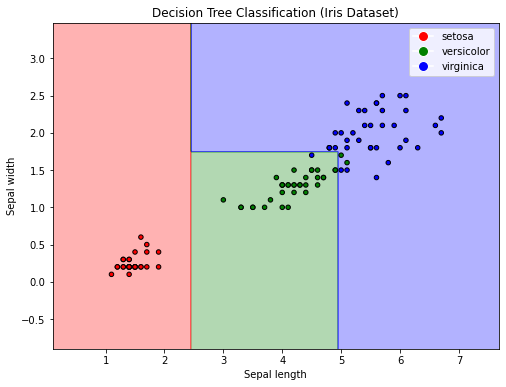

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Take only the first two features for visualization purposes
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Define the decision boundary function
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    # Create custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                          markerfacecolor=c, markersize=10) for i, c in enumerate(['red', 'green', 'blue'])]
    plt.legend(handles=handles)
    plt.title('Decision Tree Classification (Iris Dataset)')

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(clf, X_train, y_train)
plt.show()
